In [240]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.utils import shuffle
%matplotlib inline 

In [241]:
# Загрузка DataSet (уже перемешали)
df = pd.read_csv('Dataset.csv', encoding='latin-1') 

In [242]:
"""
# Предварительно перемешаем данные
df = shuffle(df)

#Запись в файл Эксель из таблицы Pandas
Shuffle_Data = pd.ExcelWriter('Shuffle_Data.xlsx')
df.to_excel(Shuffle_Data, index = False)
Shuffle_Data.save()
"""

"\n# Предварительно перемешаем данные\ndf = shuffle(df)\n\n#Запись в файл Эксель из таблицы Pandas\nShuffle_Data = pd.ExcelWriter('Shuffle_Data.xlsx')\ndf.to_excel(Shuffle_Data, index = False)\nShuffle_Data.save()\n"

In [243]:
df

,x,y,z,d_x,d_y,d_z,fi,thetta,psi,d_fi,d_thetta,d_psi,Outcome
0,-0.000044,-0.000178,-8.530000e-07,0.000044,0.000179,0.000006,-0.000018,0.000004,-0.000034,0.000018,-0.000004,0.000036,0
1,-0.110163,-0.096615,-1.051294e-01,-0.064434,-0.167006,-0.087618,-0.098391,-0.106327,-0.107474,0.851331,0.363000,-0.067917,1
2,-0.095329,-0.138420,-1.092485e-01,-0.008426,-0.113839,-0.054063,-0.044755,-0.066786,-0.104042,0.256113,0.125095,-0.032683,1
3,-0.111484,-0.102172,-1.075137e-01,-0.034207,-0.193541,-0.075497,-0.074116,-0.095515,-0.109110,0.786031,0.358000,-0.048139,1
4,-0.001287,-0.076536,-2.901535e-02,0.176885,0.006595,0.141945,0.105398,0.069049,0.007679,0.288711,0.237738,0.121593,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,0.260410,0.217396,2.486210e-01,1.720533,1.649495,1.681616,0.353578,0.308347,0.254992,-0.297591,0.816017,1.682167,1
7501,-0.003961,-0.016230,-5.896180e-03,0.003955,0.016363,0.008066,-0.001677,0.000397,-0.003799,0.001712,-0.000408,0.003984,0
7502,-0.003028,-0.012383,-4.071147e-03,0.003029,0.012460,0.005674,-0.001273,0.000303,-0.002866,0.001308,-0.000301,0.003006,0
7503,-0.016259,-0.065823,-3.617751e-02,0.016921,0.065032,0.044817,-0.006211,0.001807,-0.016364,0.005633,-0.001638,0.017159,0


In [244]:
"""
# Отбор первых 1500 строк:
task_data = df.head(1500)
"""

'\n# Отбор первых 1500 строк:\ntask_data = df.head(1500)\n'

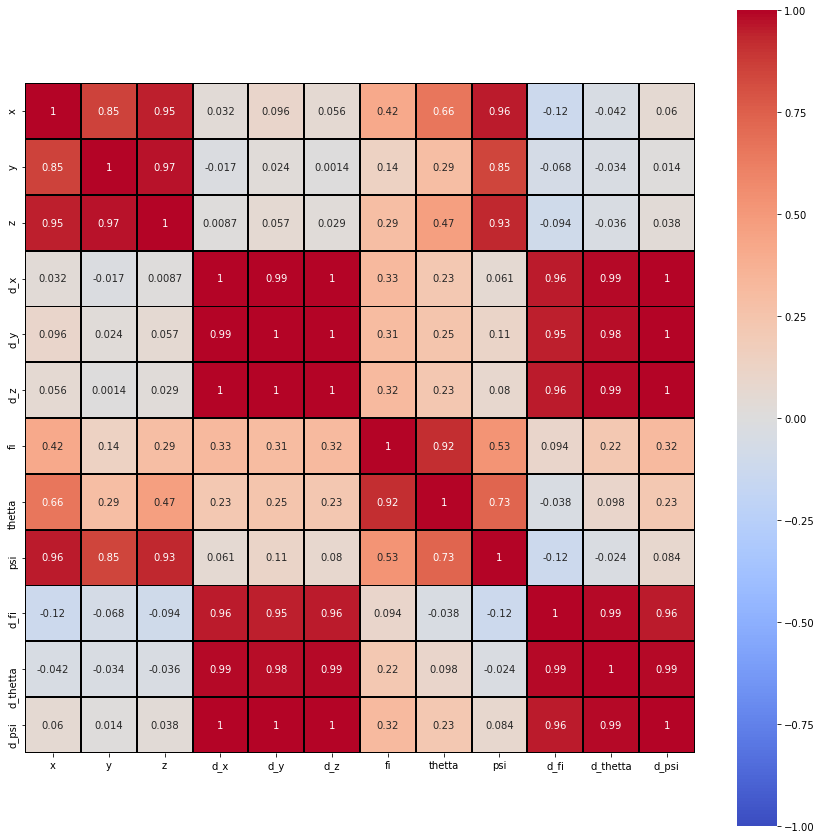

In [245]:
# Построение матрицы корреляции. "Heatmap"
import seaborn as sb

# df.corr() - загрузка датасета
# annot = True - выводит коэффициенты корреляции
# fmt = '.1g' - определяет порядок числа после десятичной запятой. '.1g' - один знак после запятой
# vmin = -1, vmax = 1, center = 0 - масштаб оси
# cmap = 'coolwarm' - определяет цвет карты
# linewidths = 0.1, linecolor = 'black' - определяет границы сеток матрицы
# cbar_kws = {'orientation': 'horizontal'} - ориентирует по горизонтале карту
# cbar = False - убирает цветовую шкалу
# square = True - каждая ячейка станет принимать квадратную форму
# matrix = np.triu(df.corr()) - операция для возвращения нижнего треугольника матрицы
# matrix = np.tril(df.corr()) - операция для возвращения вернего треугольника матрицы
# mask = matrix - аргумент для определения вывода матрицы корреляции

# plt.subplots(figsize=(20,20)) - масштаб графика. Задается до вывода графика

df_map = df.loc[:,'x':'d_psi'] # Выделение столбцов для матрицы корреляции
matrix = np.triu(df_map.corr())
plt.subplots(figsize=(15,15)) 
heatmap_correlation = sb.heatmap(df_map.corr(), annot = True, fmt = '.2g', vmin = -1, 
                                 vmax = 1, center = 0, cmap = 'coolwarm', square=True, 
                                 linewidths = 1, linecolor = 'black')

In [248]:
# Преобразование DataSet согласно корреляционному анализу. Отфильтрованные данные с пониженной размерностью!
new_data = df[['x','d_x','fi','d_fi','Outcome']]
new_data

In [22]:
"""
# Удаление коллинеарных признаков

# Зависимость между признаками
x = df['d_fi']
y = df['d_psi']

fig, ax = plt.subplots(figsize=(20,20))
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.set_xlabel('d_fi')
ax.set_ylabel('d_psi')
ax.legend(facecolor='white')
"""

"\n# Удаление коллинеарных признаков\n\n# Зависимость между признаками\nx = df['d_fi']\ny = df['d_psi']\n\nfig, ax = plt.subplots(figsize=(20,20))\nax.plot(x, y, linewidth=0, marker='s', label='Data points')\nax.set_xlabel('d_fi')\nax.set_ylabel('d_psi')\nax.legend(facecolor='white')\n"

In [28]:
"""
# Метод главных компонент PCA - уменьшаем размерность данных
data_numpy = df.to_numpy() # Конвертация в numpy массив
data_target = data_numpy[:,12]
data_features = data_numpy[:,:12]

from sklearn.decomposition import PCA

pca = PCA(n_components=11, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
#data_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 11 компонент
data_features_transformed = pca.fit(data_features)

# Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)

# Построим график зависимости доли объясненной дисперсии от количества используемых ГК
plt.plot(np.arange(11), explained_variance, ls = '-')
"""

"\n# Метод главных компонент PCA - уменьшаем размерность данных\ndata_numpy = df.to_numpy() # Конвертация в numpy массив\ndata_target = data_numpy[:,12]\ndata_features = data_numpy[:,:12]\n\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components=11, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации\n#data_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 11 компонент\ndata_features_transformed = pca.fit(data_features)\n\n# Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.\nexplained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)\n\n# Построим график зависимости доли объясненной дисперсии от количества используемых ГК\nplt.plot(np.arange(11), explained_variance, ls = '-')\n"

In [29]:
"""
# Преобразованный массив признаков по методу PCA
pca = PCA(n_components=4, svd_solver='full') 
data_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 11 компонент
data_features = pd.DataFrame(data_features_transformed) # из numpy --> pandas
data_features
"""

"\n# Преобразованный массив признаков по методу PCA\npca = PCA(n_components=4, svd_solver='full') \ndata_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 11 компонент\ndata_features = pd.DataFrame(data_features_transformed) # из numpy --> pandas\ndata_features\n"

In [30]:
# Количество строк с атаками
len(new_data[new_data['Outcome'] == 1])

6004

In [31]:
# Количество строк с нормальной работой
len(new_data[new_data['Outcome'] == 0])

1501

In [32]:
# Разделеные данных на тренировочные и тестовые. Первые 70% строк — тренировочные, остальные — тестовые.
train = new_data.head(int(len(new_data)*0.7))
test = new_data.tail(int(len(new_data)*0.3))
train.head()

#Запись в файл Эксель из таблицы Pandas
train_Data = pd.ExcelWriter('train_Data.xlsx')
train.to_excel(train_Data, index = False)
train_Data.save()

test_Data = pd.ExcelWriter('test_Data.xlsx')
test.to_excel(test_Data, index = False)
test_Data.save()

In [34]:
test.head()

,x,d_x,fi,d_fi,Outcome
5254,0.294641,1.687136,0.343610,-0.565466,1
5255,-0.003279,0.003278,-0.001382,0.001418,0
5256,-0.074214,0.306227,-0.104220,0.990418,1
5257,-0.053197,0.385860,-0.037922,0.885627,1
5258,-0.074192,0.118739,0.054337,0.162029,1


In [38]:
# Выделяем предикторы (4 первых столбцов) и отклик (Outcome):
features = list(train.columns[:4])
x = train[features]
y = train['Outcome']

In [39]:
# Подключем классификатор DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [217]:
# Задаем параметры дерева принятия решений и обучаем модель
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf = 4, #минимальное число объектов в листе
                              max_depth = 3) #максимальная глубина дерева
clf = tree.fit(x, y)

In [218]:
# Визуализация дерева
from sklearn import tree
from os import system

dotfile = open("D:/dtree2.dot", 'w')
tree.export_graphviz(clf, out_file = dotfile, feature_names = x.columns)
dotfile.close()
system("dot -Tpng D:.dot -o D:/dtree2.png")


2

In [219]:
# Глубина дерева
clf.tree_.max_depth

3

In [220]:
# Выполняем предсказание для объектов из тестовой выборки
features_x = list(test.columns[:4])
x_t = test[features_x]
y_true = test['Outcome']
y_pred = clf.predict(x_t)
x.head()

,x,d_x,fi,d_fi
0,-0.000044,0.000044,-0.000018,0.000018
1,-0.110163,-0.064434,-0.098391,0.851331
2,-0.095329,-0.008426,-0.044755,0.256113
3,-0.111484,-0.034207,-0.074116,0.786031
4,-0.001287,0.176885,0.105398,0.288711


In [221]:
# Доля правильных ответов классификатора
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9733451799200356

In [222]:
# Среднее значение метрик  F1  (Macro-F1)
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.9568790467798168

In [223]:
i = 0
df.loc[i, features_x]
# Решение алгоритма  для выбранного элемента
clf.predict([df.loc[i, features_x].tolist()])[0]

0

In [224]:
# Проверка предсказания
features_1 = list(test.columns[:5])
df.loc[i, features_1]

x         -0.000044
d_x        0.000044
fi        -0.000018
d_fi       0.000018
Outcome    0.000000
Name: 0, dtype: float64

In [225]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))


Mean Absolute Error: 0.02665482007996446
Mean Squared Error: 0.02665482007996446
Root Mean Squared Error: 0.16326303954038238


In [226]:
# Точность на тренировочных данных
train_accuracy = clf.score(x, y)
train_accuracy

0.9762040738625547

In [227]:
# Точность на тестовых данных
test_accuracy = clf.score(x_t, y_true)
test_accuracy

0.9733451799200356

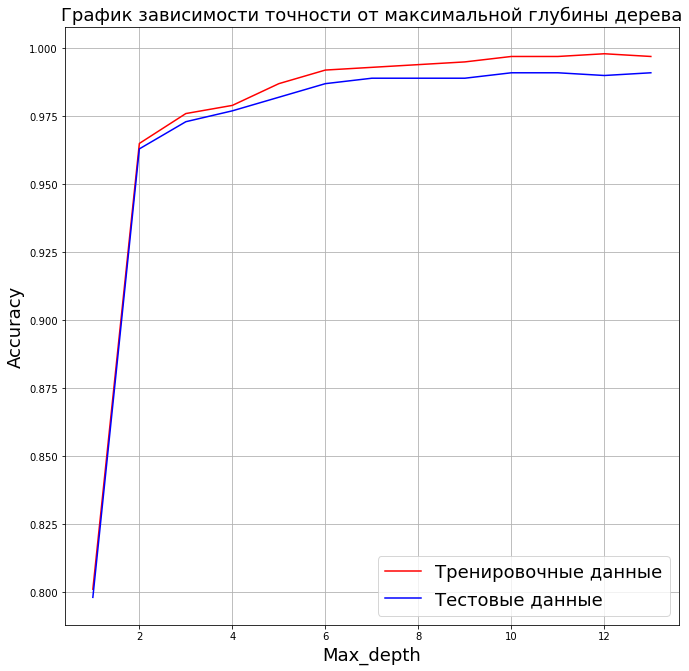

In [228]:
# График зависимости точности от глубины дерева
import matplotlib.pyplot as plt
plt.subplots(figsize=(11,11)) 
Max_depth = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
Accuracy_train = np.array([0.801, 0.965, 0.976, 0.979, 0.987, 0.992, 0.993, 0.994, 0.995, 0.997, 0.997, 0.998, 0.997])
Accuracy_test = np.array([0.798, 0.963, 0.973, 0.977, 0.982, 0.987, 0.989, 0.989, 0.989, 0.991, 0.991, 0.990, 0.991])
# Построение графика
plt.title("График зависимости точности от максимальной глубины дерева", fontsize = 18) # заголовок
plt.xlabel("Max_depth", fontsize = 18) # ось абсцисс
plt.ylabel("Accuracy", fontsize = 18) # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(Max_depth, Accuracy_train, 'r', label='Тренировочные данные')  # построение графика
plt.plot(Max_depth, Accuracy_test, 'b', label='Тестовые данные')  # построение графика
plt.legend(fontsize = 18)